# Group 2 V-Track: Technical Pitch
> Members:
> - Shantanu Dixit - 8965610
> - Serageldin Monir Farid Abdelghaffar Abdelmoaty - 9052380
> - Tai Siang Huang - 9006413
> - Jaiminiben Natvarbhai Rathod - 8941937
> - Mohammed Adeen Shaik - 8969152
---

## California State Dataset
The RIPA (Racial and Identity Profiling Act) Dataset is a statewide law enforcement data collection effort mandated by California Assembly Bill (AB) 953, passed in 2015. This legislation requires all law enforcement agencies in California that employ peace officers to collect and report detailed data on all stop incidents—including vehicle stops, pedestrian stops, and consensual encounters.

The dataset is overseen by the California Department of Justice (DOJ) and is designed to increase transparency and accountability in policing, specifically addressing concerns about racial and identity profiling.

## Exploratory Data Analysis


### 0. Preprocessing and Merge Biggest Three Cities

In [61]:
# import pandas as pd
# import os

# Define a mapping of file paths to city/county names
# file_map = {
#     "../data/RIPA Stop Data_Orange 2023_Final.xlsx": "Orange",
#     "../data/RIPA Stop Data_San Bernardino 2023_Final.xlsx": "San Bernardino",
#     "../data/RIPA Stop Data_San Diego 2023_Final.xlsx": "San Diego",
# }

# # Load, add city, and collect DataFrames
# dfs = []
# for file_path, city_name in file_map.items():
#     df = pd.read_excel(file_path)
#     df["SOURCE_COUNTY"] = city_name  # Add new column
#     dfs.append(df)

# # Concatenate all DataFrames
# merged_df = pd.concat(dfs, ignore_index=True)

# # Preview
# print("Combined shape:", merged_df.shape)
# print("City column preview:", merged_df["SOURCE_COUNTY"].unique())

# # Export to CSV
# merged_df.to_csv("../data/RIPA_2023_Biggest_Three_Cities.csv", index=False)
# print("CSV export completed: RIPA_2023_Biggest_Three_Cities.csv")

### 1. Load Dataset

In [62]:
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)

df = pd.read_csv("../data/RIPA_2023_Biggest_Three_Cities.csv")

In [63]:
# Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532167 entries, 0 to 532166
Columns: 143 entries, DOJ_RECORD_ID to SOURCE_COUNTY
dtypes: float64(46), int64(84), object(13)
memory usage: 580.6+ MB


#### Dictionary about Massive Features 
| **Column Name**            | **General Definition**                                                                 | **Data Type Classification** |
|----------------------------|---------------------------------------------------------------------------------------|--------------------------------|
| **STOP_DURATION**          | Duration of the stop, often recorded as a range or text (e.g., "10-15 minutes").       | Categorical (Text/Range)     |
| **RAE_**                   | Prefix for perceived race/ethnicity of the person stopped (e.g., RAE_WHITE, RAE_BLACK_AFRICAN_AMERICAN). Multiple fields, each indicating presence of a specific race/ethnicity. | Multi-label (Binary per field: 0=No, 1=Yes) |
| **AGE_GROUP**              | Categorized age range of the person stopped (e.g., 18-24, 25-34).                     | Categorical (1) 1-7, (2) 8-11, (3) 12-14, (4) 15-17, (5) 18-24, (6) 25-34, (7) 35-44, (8) 45-54, (9) 55-64, (10) 65 and older               |
| **REASON_FOR_STOP**        | Primary reason for the stop.           | Categorical (1 Traffic Violation, 2 Reasonable suspicion, 3 Parole/probation/PRCS/mandatory supervision, 4 Knowledge of outstanding arrest/wanted person, 5 Investigation to determine whether person was truant, 6 Consensual encounter resulting in search, 7 Possible conduct under Education Code, 8 Determine whether student violated school policy) |
| **RFS_TRAFFIC_VIOLATION_TYPE**        | Primary type of traffic violation          | Categorical  (1 Moving,2 Equipment,3 Non-moving Blank )               |
| **RFS_**                   | Prefix for detailed reason-for-stop fields (e.g., RFS_TRAFFIC_VIOLATION_TYPE, RFS_RS_CODE). Includes violation types or specific codes. | Categorical (per field, e.g., 1=Moving, 2=Equipment) |
| **ADS_**                   | Prefix for actions taken during the stop (e.g., ADS_HANDCUFFED, ADS_SEARCH_PERSON). Each field indicates if a specific action occurred. | Multi-label (Binary per field: 0=No, 1=Yes) |
| **ROS_**                   | Prefix for results of the stop (e.g., ROS_CITATION, ROS_ARREST). Each field indicates the outcome of the stop. | Multi-label (Binary per field: 0=No, 1=Yes) |

In [64]:
df.head()

,DOJ_RECORD_ID,PERSON_NUMBER,AGENCY_ORI,AGENCY_NAME,TIME_OF_STOP,DATE_OF_STOP,STOP_DURATION,CLOSEST_CITY,SCHOOL_CODE,SCHOOL_NAME,...,ROS_CONTACT_LEGAL_GUARDIAN,ROS_PSYCH_HOLD,ROS_US_HOMELAND,ROS_REFERRAL_SCHOOL_ADMIN,ROS_REFERRAL_SCHOOL_COUNSELOR,ROS_WARNING_CDS,ROS_CITATION_CDS,ROS_IN_FIELD_CITE_RELEASE_CDS,ROS_CUSTODIAL_WOUT_WARRANT_CDS,SOURCE_COUNTY
0,W30002331843SDGK4N7V,1,CA0300000,ORANGE CO SO,12:00:00,2023-10-06,10,YORBA LINDA,NaN,NaN,...,0,0,0,0,0,54657,NaN,NaN,NaN,Orange
1,W300023217ZLEMJII59D,1,CA0300000,ORANGE CO SO,13:26:00,2023-04-05,5,SAN CLEMENTE,NaN,NaN,...,0,0,0,0,0,NaN,54106,NaN,NaN,Orange
2,W300023096X0QHQ9T1MP,1,CA0300000,ORANGE CO SO,23:25:00,2023-02-24,10,DANA POINT,NaN,NaN,...,0,0,0,0,0,54109,NaN,NaN,NaN,Orange
3,W300023217ZK78OBLIR4,1,CA0300000,ORANGE CO SO,19:13:00,2023-04-01,120,YORBA LINDA,NaN,NaN,...,0,0,0,0,0,NaN,42107,NaN,42107,Orange
4,W3000230968GIYMUIH4H,1,CA0300000,ORANGE CO SO,19:08:00,2023-01-19,10,RANCHO SANTA MARGARITA,NaN,NaN,...,0,0,0,0,0,54191,NaN,NaN,NaN,Orange


### 2. Traffic Violation Types

In [65]:
# Show unique traffic violation types
violation_types = df['RFS_TRAFFIC_VIOLATION_TYPE'].dropna().unique()
violation_types = sorted(violation_types)

for v in violation_types:
    print(f"- {v}")

- 1.0
- 2.0
- 3.0


#### `RFS_TRAFFIC_VIOLATION_TYPE` – Type of Traffic Violation

This field defines the **type of traffic violation** indicated during a stop. It is a categorical variable with the following values:

| Value | Description           |
| ----- | --------------------- |
| 1     | Moving                |
| 2     | Equipment             |
| 3     | Non-moving            |


### 3. Handle Missing Value & Clearn
1. Confirm missing percentage at blank-able columns
2. Confirm `REASON_FOR_STOP` and `RFS_TRAFFIC_VIOLATION_TYPE` foucs on traffic violation
3. Define critical columns shouldn't be blank or nan
4. Drop missing value

In [66]:
# Check column names and missing values
print("\nMissing Values Include Non-critical Columns (Count and Percentage):\n")
missing_info = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing_info[missing_info['Missing Count'] > 0])  # Show only columns with missing values

# Critical columns where missing values are not acceptable
critical_columns = [
    'STOP_DURATION', 'REASON_FOR_STOP', 'RFS_TRAFFIC_VIOLATION_TYPE', 'RAE_FULL', 
]

# Calculate missing value percentage for critical columns
critical_missing_info = pd.DataFrame({
    'Missing Count': df[critical_columns].isnull().sum(),
    'Missing Percentage': (df[critical_columns].isnull().sum() / len(df) * 100).round(2)
})
print("\nCritical Columns Missing Value Percentage:")
print(critical_missing_info)

# Drop rows with missing values in critical columns
initial_rows = len(df)
df = df[(df['REASON_FOR_STOP'] == 1)].dropna(subset=critical_columns)
dropped_rows = initial_rows - len(df)
print(f"\nDropped {dropped_rows} rows due to missing values in critical columns: {critical_columns}")

# Final missing value check for critical columns
missing_after = df[critical_columns].isnull().sum()
if missing_after.sum() > 0:
    print("\nWarning: Some critical columns still have missing values after handling:")
    print(missing_after[missing_after > 0])
else:
    print("\nMissing Values in Critical Columns (Count and Percentage):")
    critical_missing_info = pd.DataFrame({
        'Missing Count': df[critical_columns].isnull().sum(),
        'Missing Percentage': (df[critical_columns].isnull().sum() / len(df) * 100).round(2)
    })
    print(critical_missing_info)

# Confirm final dataset size
print(f"\nFinal dataset size: {df.shape[0]} rows, {df.shape[1]} columns")


Missing Values Include Non-critical Columns (Count and Percentage):

                                Missing Count  Missing Percentage
SCHOOL_CODE                            529757               99.55
SCHOOL_NAME                            529809               99.56
RFS_TRAFFIC_VIOLATION_TYPE             152967               28.74
RFS_TRAFFIC_VIOLATION_CODE             152971               28.74
RFS_RS_CODE                            425230               79.91
RFS_RS_OFF_WITNESS                     406999               76.48
RFS_RS_MATCH_SUSPECT                   406999               76.48
RFS_RS_WITNESS_ID                      406999               76.48
RFS_RS_CARRY_SUS_OBJECT                406999               76.48
RFS_RS_ACTIONS_INDICATIVE              406999               76.48
RFS_RS_SUSPECT_LOOK                    406999               76.48
RFS_RS_DRUG_TRANS                      406999               76.48
RFS_RS_VIOLENT_CRIME                   406999               76.48
RFS_RS

#### Key Insights:
1. Based on the dictionary "RIPA Dataset Read Me 2023.pdf", most of the columns with prefixes contain blanks.
2. Keep `REASON_FOR_STOP` = 1 (traffic violation), and `RFS_TRAFFIC_VIOLATION_TYPE` doesn't have missing value, which means the remaining dataset is determined to focus on traffic violations.
3. [`STOP_DURATION`, `REASON_FOR_STOP`, `RFS_TRAFFIC_VIOLATION_TYPE`, `RAE_FULL`] define as critical columns which are our targets.
4. After dropping `152970` rows, final dataset remain `379197` rows

### 4. Calculate the Average Stop Duration

In [67]:
# cleaning the numerics from column
df['STOP_DURATION_CLEAN'] = df['STOP_DURATION'].astype(str).str.extract(r'(\d+)').astype(float)

In [68]:
mean_duration = df['STOP_DURATION_CLEAN'].mean()
print(f"Mean Stop Duration: {mean_duration:.2f} minutes")

Mean Stop Duration: 12.20 minutes


### 5. Filter the outliers by IQR, Threshold=1.5

In [69]:
# Drop NaNs to avoid plot errors
duration_data = df['STOP_DURATION_CLEAN'].dropna()

In [70]:
# Calculate Q1, Q3, and IQR
Q1 = duration_data.quantile(0.25)
Q3 = duration_data.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outlier filtering
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
filtered_duration = duration_data[(duration_data >= lower_bound) & (duration_data <= upper_bound)]

# Calculate mean of filtered duration
mean_duration = filtered_duration.mean()

# Count remaining rows
remaining_rows = len(filtered_duration)

# Print results
print(f"Mean Stop Duration after filtering outliers: {mean_duration:.2f} minutes")
print(f"Number of rows left after filtering outliers: {remaining_rows}")

Mean Stop Duration after filtering outliers: 7.85 minutes
Number of rows left after filtering outliers: 334250


### 6. Distribution of Stop Duration (minutes)

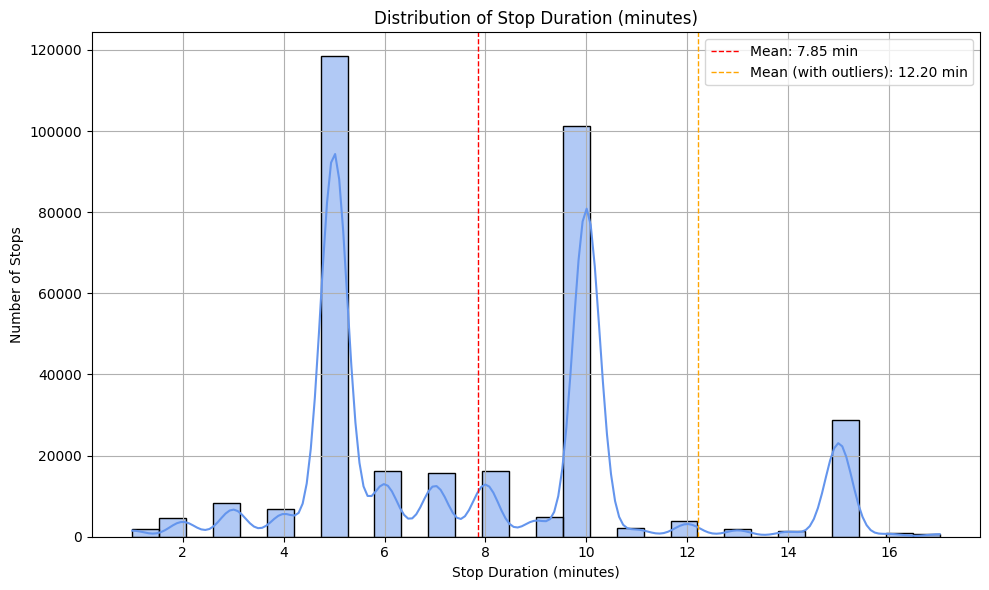

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_duration, bins=30, kde=True, color='cornflowerblue')
plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_duration:.2f} min')
# Add the mean line with outliers
plt.axvline(duration_data.mean(), color='orange', linestyle='dashed', linewidth=1, label=f'Mean (with outliers): {duration_data.mean():.2f} min')

plt.title("Distribution of Stop Duration (minutes)")
plt.xlabel("Stop Duration (minutes)")
plt.ylabel("Number of Stops")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Key Insights:
1. There is a gap `4.35` minutes between with and without outliers.
2. Our RAG-Based system focus on reducing stop duration under 10 minutes, therefore we still have to consider outliers.
3. At previous iterations, we explore the dataset of **Washington** and **California (Butte, El Dorado, Humboldt)** that shows mean durations are `8.9` and `17.03` minutes, separately.
4. Current datasets are the biggest three cities **(Orange, San Bernardino, San Diego) in California**, prsents the mean duration are `12.2(with outliers)` and `7.85(without outliers)` minutes.

### 7. Distribution of Stop Duration Exceed 10 minutes 

Total rows in dataset: 379197
Number of stops exceeding 10 minutes: 84975
Percentage of stops exceeding 10 minutes: 22.41%
Mean duration of stops exceeding 10 minutes: 30.36 minutes
Median duration of stops exceeding 10 minutes: 20.0 minutes
Standard deviation of stops exceeding 10 minutes: 73.67 minutes


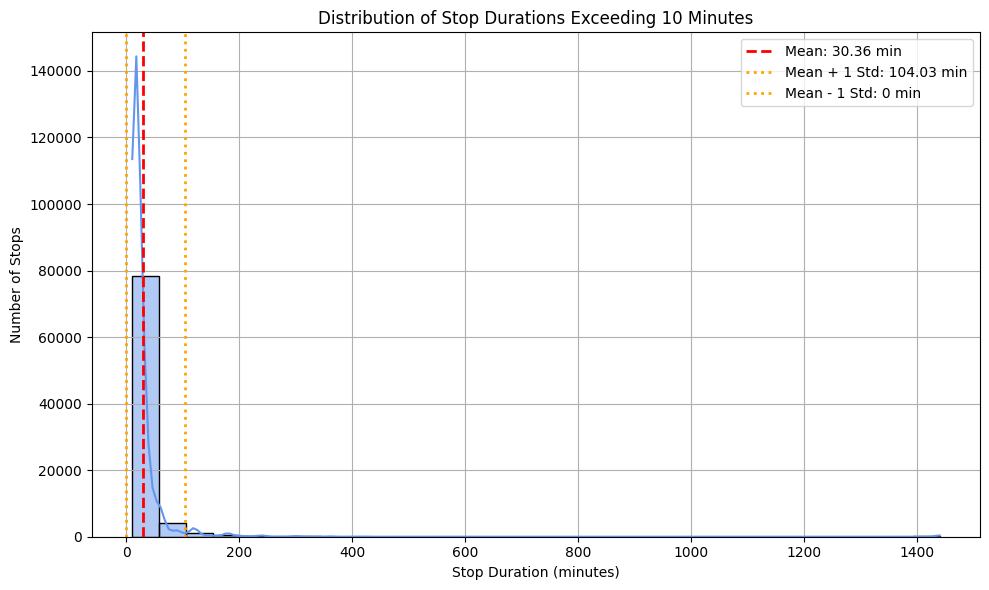

Number of stops exceeding 10 minutes within (mean ± std) range: 82435


In [72]:
# Filter stops exceeding 10 minutes
df_exceed_10 = df[df['STOP_DURATION_CLEAN'] > 10].copy()

# Calculate statistics
long_stop_count = len(df_exceed_10)
total_rows = len(df)
long_stop_percentage = round((long_stop_count / total_rows * 100), 2)
long_stop_mean = df_exceed_10['STOP_DURATION_CLEAN'].mean().round(2)
long_stop_median = df_exceed_10['STOP_DURATION_CLEAN'].median().round(2)
long_stop_std = df_exceed_10['STOP_DURATION_CLEAN'].std().round(2)

# Print statistics
print(f"Total rows in dataset: {total_rows}")
print(f"Number of stops exceeding 10 minutes: {long_stop_count}")
print(f"Percentage of stops exceeding 10 minutes: {long_stop_percentage}%")
print(f"Mean duration of stops exceeding 10 minutes: {long_stop_mean} minutes")
print(f"Median duration of stops exceeding 10 minutes: {long_stop_median} minutes")
print(f"Standard deviation of stops exceeding 10 minutes: {long_stop_std} minutes")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_exceed_10, x='STOP_DURATION_CLEAN', bins=30, kde=True, color='cornflowerblue')

# Add mean line
plt.axvline(long_stop_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {long_stop_mean} min')
# Add mean ± 1 std lines
plt.axvline(long_stop_mean + long_stop_std, color='orange', linestyle='dotted', linewidth=2, label=f'Mean + 1 Std: {(long_stop_mean + long_stop_std):.2f} min')
plt.axvline(0, color='orange', linestyle='dotted', linewidth=2, label=f'Mean - 1 Std: 0 min')

plt.title("Distribution of Stop Durations Exceeding 10 Minutes")
plt.xlabel("Stop Duration (minutes)")
plt.ylabel("Number of Stops")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Select samples exceeding 10 minutes and within (mean ± std) range
df_exceed_10_in_range = df_exceed_10[
    (df_exceed_10['STOP_DURATION_CLEAN'] >= 0) &
    (df_exceed_10['STOP_DURATION_CLEAN'] <= long_stop_mean + long_stop_std)
]
print(f"Number of stops exceeding 10 minutes within (mean ± std) range: {len(df_exceed_10_in_range)}")  

#### Key Insights:
1. Percentage of stops exceeding 10 minutes: `22.41%`, highlights that over one-fifth out of total dataset, underscoring the need for intervention.
2. Median duration of stops exceeding 10 minutes: `20.0 minutes`, indicates that half of these stops are at least 20 minutes, providing a more robust central tendency measure less affected by outliers compared to the mean.
3. The current `30.36-minute` mean for long stops, compared to the `7.85-minute` filtered mean, suggests potential for improvement.
4. To avoid human input errors, `df_exceed_10_in_range` **(82435 rows)** using a statistical range (mean ± 1 Std) to represent data with stop duration exceeding 10 minutes.
    - **Advantage:** Avoid extrem outliers, normally distributed.
    - **Disadvantage:** Valid data greater than 104.03 minutes may be ignored.

### 8. Confirm Dataset if Balance (RAE_FULL)


Race/Ethnicity Distribution (RAE_FULL, %)
                      Race/Ethnicity  Percentage
RAE_FULL                                        
1                              Asian        7.73
2             Black/African American        9.44
3                    Hispanic/Latino       43.55
4         Middle Eastern/South Asian        4.54
5                    Native American        0.14
6                   Pacific Islander        0.62
7                              White       31.81
8                        Multiracial        2.16


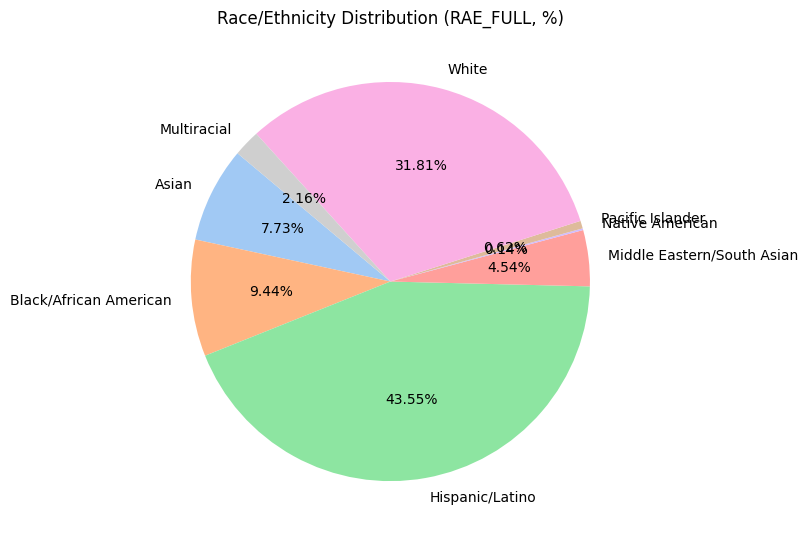

In [73]:
# Mapping for RAE_FULL codes to race/ethnicity labels
rae_labels = {
    1: "Asian",
    2: "Black/African American",
    3: "Hispanic/Latino",
    4: "Middle Eastern/South Asian",
    5: "Native American",
    6: "Pacific Islander",
    7: "White",
    8: "Multiracial"
}

# Prepare data for pie chart
race_counts = df['RAE_FULL'].value_counts().sort_index()
labels = [rae_labels.get(code, str(code)) for code in race_counts.index]
percentages = (race_counts / total_rows * 100).round(2)
print("\nRace/Ethnicity Distribution (RAE_FULL, %)")
print(pd.DataFrame({"Race/Ethnicity": labels, "Percentage": percentages}))

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.2f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Race/Ethnicity Distribution (RAE_FULL, %)")
plt.tight_layout()
plt.show()

#### Key Insights:
1. Hispanic and White individuals together make up the majority of California’s population, accounting for approximately 73% combined (40% Hispanic and 33% White). (Census Reporter, 2022)
2. **Not Fully Balanced**: Compare to the census report, the dataset is not balanced across all `RAE_FULL` categories. While the `Hispanic + White` majority aligns closely with Census data `(75.36% vs. 73%)`, the significant underrepresentation of `Asian (-8.27%)` and overrepresentation of `Black/African American (+4.44%)` indicate <u>**imbalance**</u>. This skew likely reflects real-world traffic stop disparities rather than a sampling error, as policing data often shows higher stop rates for certain groups.
3. A hybrid approach: focusing on `ADS_*/ RFS_*` for retrieval and auditing with `RAE_*`, balances efficiency and equity.

### 9. Correlation between ADS_* and Stop Duration Exceed 10 minutes 

1. Rank stop duration by median of each ADS_ (less affected by outliers)
2. Display a bar chart above

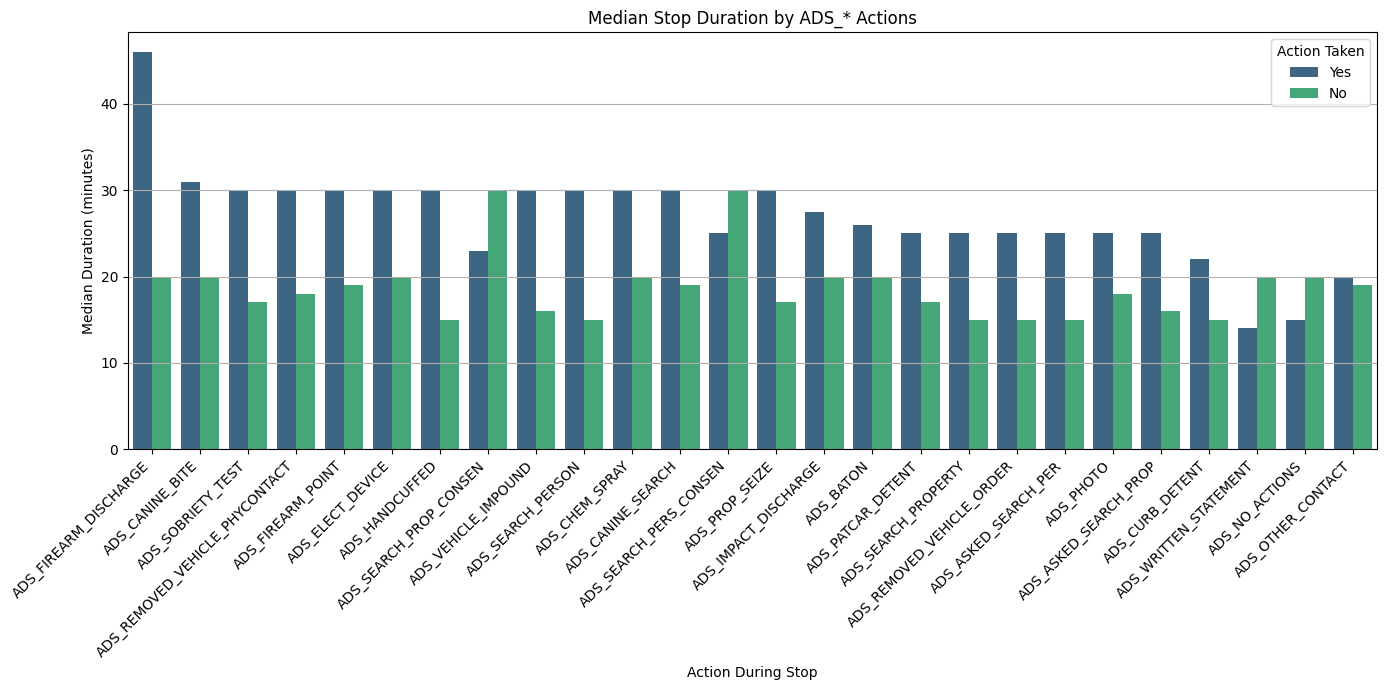

                            Action  Diff (Yes-No)
17           ADS_FIREARM_DISCHARGE           26.0
35               ADS_SEARCH_PERSON           15.0
9                   ADS_HANDCUFFED           15.0
43             ADS_VEHICLE_IMPOUND           14.0
5                ADS_SOBRIETY_TEST           13.0
41                  ADS_PROP_SEIZE           13.0
3   ADS_REMOVED_VEHICLE_PHYCONTACT           12.0
23                 ADS_CANINE_BITE           11.0
13               ADS_CANINE_SEARCH           11.0
15               ADS_FIREARM_POINT           11.0
33            ADS_ASKED_SEARCH_PER           10.0
19                ADS_ELECT_DEVICE           10.0
27                  ADS_CHEM_SPRAY           10.0
39             ADS_SEARCH_PROPERTY           10.0
1        ADS_REMOVED_VEHICLE_ORDER           10.0
37           ADS_ASKED_SEARCH_PROP            9.0
11               ADS_PATCAR_DETENT            8.0
21            ADS_IMPACT_DISCHARGE            7.5
7                  ADS_CURB_DETENT            7.0


In [74]:
# Identify all ADS_* columns
ads_columns = [col for col in df_exceed_10_in_range.columns if col.startswith('ADS_')]

# Calculate median stop duration for each ADS_* action (0 = No, 1 = Yes)
median_durations = {}
for col in ads_columns:
    medians = df_exceed_10_in_range.groupby(col)['STOP_DURATION_CLEAN'].median().round(2)
    median_durations[col] = medians.to_dict()

# Prepare data for plotting (unpivot to long format for seaborn)
plot_data = []
for col in ads_columns:
    medians = median_durations[col]
    diff = None
    if 0 in medians and 1 in medians:
        diff = medians[1] - medians[0]

    for value, median in medians.items():
        plot_data.append({
            'Action': col,
            'Value': 'Yes' if value == 1 else 'No',
            'Median Duration': median,
            'Diff (Yes-No)': diff
        })

plot_df = pd.DataFrame(plot_data)

# Sort by median duration for better visualization
plot_df = plot_df.sort_values('Median Duration', ascending=False)

# Plot bar chart
plt.figure(figsize=(14, 7))
sns.barplot(data=plot_df, x='Action', y='Median Duration', hue='Value', palette='viridis')
plt.title("Median Stop Duration by ADS_* Actions")
plt.xlabel("Action During Stop")
plt.ylabel("Median Duration (minutes)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Action Taken')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Shows the time gap between taking action and not taking action
diff_df = plot_df.drop_duplicates(subset=['Action'])[['Action', 'Diff (Yes-No)']]
print(diff_df.sort_values('Diff (Yes-No)', ascending=False))

# Compare the stop duration of ADS_NO_ACTIONS be taken or not
no_action_time = df_exceed_10_in_range[df_exceed_10_in_range['ADS_NO_ACTIONS'] == 0]['STOP_DURATION_CLEAN']
yes_action_time = df_exceed_10_in_range[df_exceed_10_in_range['ADS_NO_ACTIONS'] > 0]['STOP_DURATION_CLEAN']
print(f"\nMedian Stop Duration with No Actions: {no_action_time.median():.2f} minutes")
print(f"Median Stop Duration with Actions: {yes_action_time.median():.2f} minutes")   

#### Key Insights:
1. Compare whether the action was taken alone, without considering multiple actions being taken at the same time.
2. Overall, no actions actually reduce 5 minutes of stop duration than do actions.
3. **No > Yes:**
    - `ADS_SEARCH_PROP_CONSEN`, `ADS_SEARCH_PERS_CONSEN`, represents that refusing to be searched will increase duration.
    - `ADS_WRITTEN_STATEMENT`, a student's refusal to admit may increase the duration of the stop.
4. **Yes > No:**
    - The top 5 with action taken, `ADS_FIREARM_DISCHARGE`, `ADS_HANDCUFFED`, `ADS_SEARCH_PERSON`, `ADS_VEHICLE_IMPOUND`, `ADS_PROP_SEIZE`, all will add at least **13 minutes**.
5. Primary Targets for RAG: Focus on these top 5 action taken as the biggest contributors to durations > 10 minutes.

### 10. Correlation between RFS_TRAFFIC_VIOLATION_TYPE and Stop Duration Exceed 10 minutes 

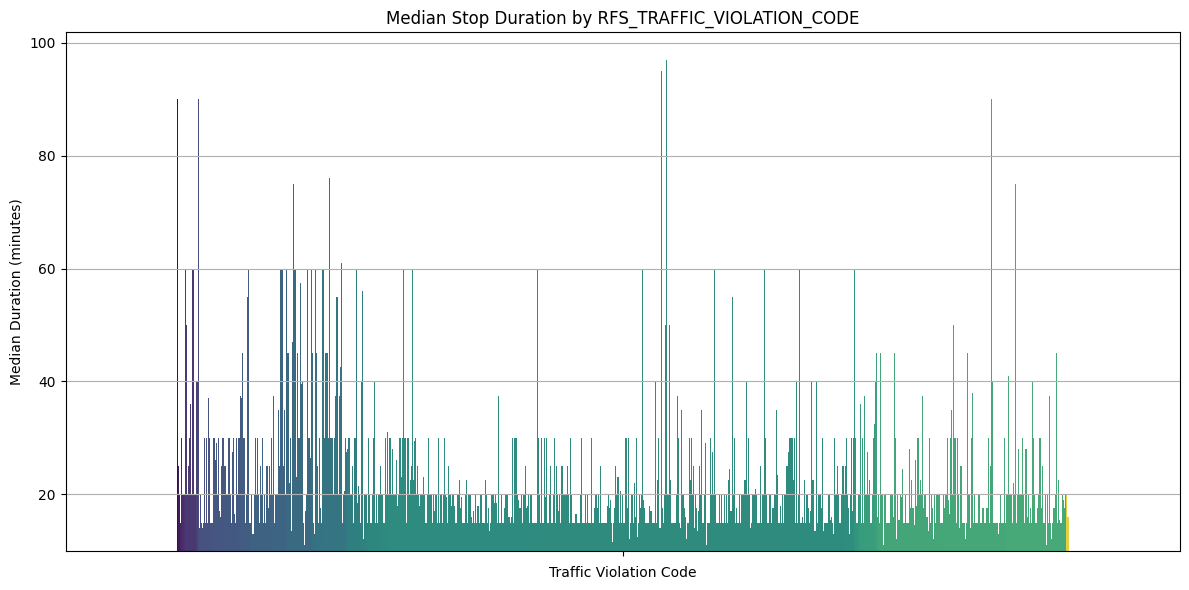

In [75]:
violation_code_column = 'RFS_TRAFFIC_VIOLATION_CODE' 

# Filter out rows where violation code or duration is NaN
data = df_exceed_10_in_range[[violation_code_column, 'STOP_DURATION_CLEAN']]

# Calculate median stop duration for each violation code
median_durations = data.groupby(violation_code_column)['STOP_DURATION_CLEAN'].median().round(2)

# Prepare data for plotting
plot_data = pd.DataFrame({
    'Violation Code': median_durations.index,
    'Median Duration': median_durations.values
})

# Sort by median duration for ranking
plot_data = plot_data.sort_values('Median Duration', ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, hue='Violation Code', y='Median Duration', palette='viridis', legend=False)
plt.title("Median Stop Duration by RFS_TRAFFIC_VIOLATION_CODE")
plt.xlabel("Traffic Violation Code")
plt.ylabel("Median Duration (minutes)")
plt.ylim(bottom=10)  # Set y-axis minimum to 10 minutes
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

`Median Stop Duration by RFS_TRAFFIC_VIOLATION_CODE` This histogram does not clearly identify which code increases the most stop duration, therefor define each 20-minute bins for median durations

#### Distribution of Median Stop Durations by Violation Code Groups


Total number of unique violation codes: 1139

Count of Violation Codes in Each Duration Group:
Duration Group
10-20     552
20-40     220
40-60      47
60-80       4
80-100      5
100+        0
Name: count, dtype: int64


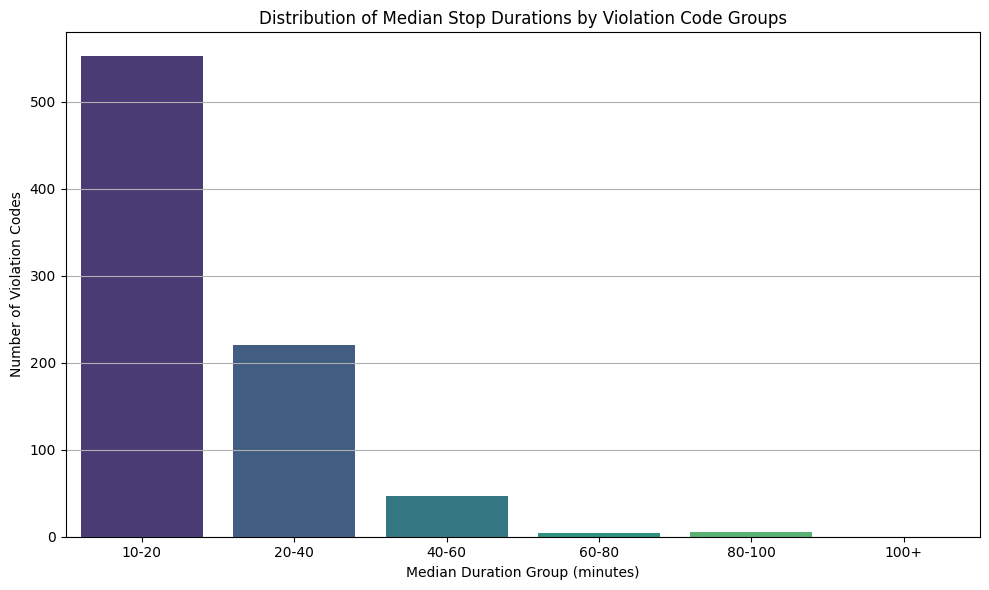

In [76]:
# Print total number of unique violation codes
unique_violation_codes = df[violation_code_column].nunique()
print(f"\nTotal number of unique violation codes: {unique_violation_codes}")
# Calculate median stop duration for each violation code
median_durations = data.groupby(violation_code_column)['STOP_DURATION_CLEAN'].median().round(2)

# Create a DataFrame with violation codes and their medians
median_df = pd.DataFrame({
    'Violation Code': median_durations.index.astype(int),
    'Median Duration': median_durations.values
})

# Define 20-minute bins for median durations
bins = [10, 20, 40, 60, 80, 100, float('inf')] 
labels = ['10-20', '20-40', '40-60', '60-80', '80-100', '100+']
median_df['Duration Group'] = pd.cut(median_df['Median Duration'], bins=bins, labels=labels, include_lowest=True)

# Group by duration bins and count violation codes
group_counts = median_df['Duration Group'].value_counts().sort_index()

# Print tabular output
print("\nCount of Violation Codes in Each Duration Group:")
print(group_counts)


# List the RFS_TRAFFIC_VIOLATION_CODE contained in each Group
# grouped_codes = median_df.groupby('Duration Group', observed=True)['Violation Code'].apply(list)
# print("\nRFS_TRAFFIC_VIOLATION_CODE in each group：")
# for group, codes in grouped_codes.items():
#     print(f"{group}: {codes}")

# The bar chart shows the x-axis as the label for each group
plt.figure(figsize=(10, 6))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette='viridis', legend=False)
plt.title("Distribution of Median Stop Durations by Violation Code Groups")
plt.xlabel("Median Duration Group (minutes)")
plt.ylabel("Number of Violation Codes")
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

#### Key Insights:
1. **Majority of Violation Codes Result:** `552` out of `1139` codes `(48.46%)` have median stop durations between 10 and 20 minutes, indicating that nearly half of the violation types are associated with durations close to or slightly above your 10-minute target.
2. **Significant Proportion of Codes Extend Beyond 20 Minutes:** `276` codes (`24.23%` of total) have medians in the 20–40 minute range.
3. **Rare but Extreme Durations Are Present:** `9` codes (`0.79%`) have medians **between 60 and 100 minutes**, with no codes exceeding 100 minutes. This small group includes the highest median durations observed.
4. These insights effectively underscore the necessity of the RAG system by identifying specific violation code groups (20–40, 40–100 minutes) driving long stops, supporting your goal to reduce the mean duration.

### 11. Correlation between RFS_TRAFFIC_VIOLATION_TYPE and Stop Duration Exceed 10 minutes 

Total stops exceeding 10 minutes: 82435

Count of Stops Exceeding 10 Minutes by RFS_TRAFFIC_VIOLATION_TYPE:
RFS_TRAFFIC_VIOLATION_TYPE
1.0    37067
2.0    32188
3.0    13180
Name: count, dtype: int64

Percentage of Stops Exceeding 10 Minutes by RFS_TRAFFIC_VIOLATION_TYPE:
RFS_TRAFFIC_VIOLATION_TYPE
1.0    44.97
2.0    39.05
3.0    15.99
Name: count, dtype: float64


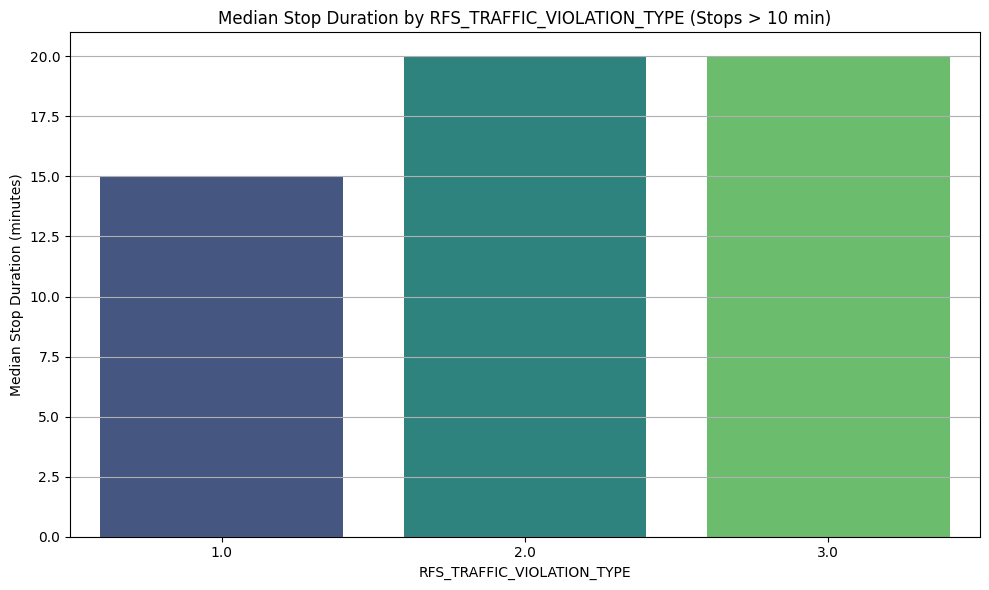

In [77]:
# Count the number of stops exceeding 10 minutes per violation type
violation_counts = df_exceed_10_in_range['RFS_TRAFFIC_VIOLATION_TYPE'].value_counts().sort_index()

# Calculate the percentage of each violation type among stops > 10 minutes
total_exceed = len(df_exceed_10_in_range)
violation_percentages = (violation_counts / total_exceed * 100).round(2)

# Print summary for context
print(f"Total stops exceeding 10 minutes: {total_exceed}")
print("\nCount of Stops Exceeding 10 Minutes by RFS_TRAFFIC_VIOLATION_TYPE:")
print(violation_counts)
print("\nPercentage of Stops Exceeding 10 Minutes by RFS_TRAFFIC_VIOLATION_TYPE:")
print(violation_percentages)

# Plot bar chart with y-axis as Stop Duration (median per violation type)
median_stop_duration = df_exceed_10_in_range.groupby('RFS_TRAFFIC_VIOLATION_TYPE')['STOP_DURATION_CLEAN'].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=median_stop_duration.index.astype(str), y=median_stop_duration.values, hue=median_stop_duration.index.astype(str), palette='viridis', legend=False)
plt.title("Median Stop Duration by RFS_TRAFFIC_VIOLATION_TYPE (Stops > 10 min)")
plt.xlabel("RFS_TRAFFIC_VIOLATION_TYPE")
plt.ylabel("Median Stop Duration (minutes)")
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Statistical tests


### 1. Normality test (shapiro) about Stop Duration Exceed 10 minutes 

In [78]:
from scipy.stats import shapiro

stat, p = shapiro(df_exceed_10_in_range)
print(f"Shapiro-Wilk Test → W = {stat:.4f}, p = {p:.4f}")
if p < 0.05:
    print("Data is NOT normally distributed.")
else:
    print("Data is normally distributed.")

Shapiro-Wilk Test → W = nan, p = nan
Data is normally distributed.


Since `df_exceed_10_in_range` is normally distributed, parametric tests are valid and use the <u>**mean**</u> as the central measure. This maximizes statistical power and aligns with the assumption of normality.

### 2. Independent t-test (for Binary Features `ADS_*`)
- **Null Hypothesis (H₀):** The mean stop duration is the same for stops where the `ADS_*` action is not taken (0) and where it is taken (1).
    - Example for `ADS_HANDCUFFED`: The mean stop duration is equal regardless of whether handcuffing occurred.
- **Alternative Hypothesis (H₁):** The mean stop duration differs between stops where the `ADS_*` action is not taken (0) and where it is taken (1).
    - Example for `ADS_HANDCUFFED`: The mean stop duration is different when handcuffing occurred compared to when it did not.

In [79]:
from scipy.stats import ttest_ind

# Identify all ADS_* columns dynamically
ads_columns = [col for col in df_exceed_10_in_range.columns if col.startswith('ADS_')]

# Perform independent t-test for each ADS_* feature
for col in ads_columns:
    # Split data into two groups (0 = No, 1 = Yes)
    group0 = df_exceed_10_in_range[df_exceed_10_in_range[col] == 0]['STOP_DURATION_CLEAN'].dropna()
    group1 = df_exceed_10_in_range[df_exceed_10_in_range[col] == 1]['STOP_DURATION_CLEAN'].dropna()

    # Check if both groups have data
    if len(group0) > 0 and len(group1) > 0:
        # Perform t-test (Welch's t-test assumes unequal variances)
        t_stat, p_value = ttest_ind(group0, group1, equal_var=False)
        
        # Calculate means for context
        mean0 = group0.mean().round(2)
        mean1 = group1.mean().round(2)

        # Print results
        print(f"\nIndependent t-test for {col}:")
        print(f"H0: The mean stop duration is the same with and without {col.replace('ADS_', '').lower().replace('_', ' ')}.")
        print(f"H1: The mean stop duration differs with and without {col.replace('ADS_', '').lower().replace('_', ' ')}.")
        print(f"Mean Duration (No = 0): {mean0} minutes")
        print(f"Mean Duration (Yes = 1): {mean1} minutes")
        print(f"t-statistic={t_stat:.2f}, p-value={p_value:.4f}")
        if p_value < 0.05:
            print(f"Reject H0: {col} significantly affects mean stop duration.")
        else:
            print(f"Fail to reject H0: No significant effect from {col} on mean duration.")
    else:
        print(f"\nSkipping {col}: Insufficient data in one or both groups.")

# Summary of significant actions
significant_actions = [col for col in ads_columns if len(df_exceed_10_in_range[df_exceed_10_in_range[col] == 1]) > 0 
                     and ttest_ind(df_exceed_10_in_range[df_exceed_10_in_range[col] == 0]['STOP_DURATION_CLEAN'].dropna(),
                                   df_exceed_10_in_range[df_exceed_10_in_range[col] == 1]['STOP_DURATION_CLEAN'].dropna(),
                                   equal_var=False)[1] < 0.05]
print(f"\nSignificant Actions Affecting Duration: {significant_actions}")

# Summary of non-significant actions
non_significant_actions = [col for col in ads_columns if len(df_exceed_10_in_range[df_exceed_10_in_range[col] == 1]) > 0 
                          and ttest_ind(df_exceed_10_in_range[df_exceed_10_in_range[col] == 0]['STOP_DURATION_CLEAN'].dropna(),
                                        df_exceed_10_in_range[df_exceed_10_in_range[col] == 1]['STOP_DURATION_CLEAN'].dropna(),
                                        equal_var=False)[1] >= 0.05]
print(f"\nNon-Significant Actions Affecting Duration: {non_significant_actions}")


Independent t-test for ADS_REMOVED_VEHICLE_ORDER:
H0: The mean stop duration is the same with and without removed vehicle order.
H1: The mean stop duration differs with and without removed vehicle order.
Mean Duration (No = 0): 20.79 minutes
Mean Duration (Yes = 1): 29.39 minutes
t-statistic=-69.44, p-value=0.0000
Reject H0: ADS_REMOVED_VEHICLE_ORDER significantly affects mean stop duration.

Independent t-test for ADS_REMOVED_VEHICLE_PHYCONTACT:
H0: The mean stop duration is the same with and without removed vehicle phycontact.
H1: The mean stop duration differs with and without removed vehicle phycontact.
Mean Duration (No = 0): 22.61 minutes
Mean Duration (Yes = 1): 31.27 minutes
t-statistic=-24.97, p-value=0.0000
Reject H0: ADS_REMOVED_VEHICLE_PHYCONTACT significantly affects mean stop duration.

Independent t-test for ADS_SOBRIETY_TEST:
H0: The mean stop duration is the same with and without sobriety test.
H1: The mean stop duration differs with and without sobriety test.
Mean Du

#### Key Insights:
1. **Majority of Actions Significantly Increase Stop Durations:** 
    - `ADS_HANDCUFFED`: 21.4 minutes (No) vs. 33.5 minutes (Yes), +12.1 minutes.
    - `ADS_SEARCH_PERSON`: 20.82 minutes (No) vs. 30.55 minutes (Yes), +9.73 minutes.
2. **No-Action Indicator as a <u>Key Benchmark</u>:** `ADS_NO_ACTIONS` shows 18.28 minutes (Yes do not act) vs. 28.01 minutes (No do act), a **-9.73-minute** difference, with a significant p-value (0.0000, t=107.69).
3. **Unexpected Reduction with Written Statements:** `ADS_WRITTEN_STATEMENT` shows a mean of 14.0 minutes (Yes) vs. 22.87 minutes (No), a -8.87-minute difference, but with **nan** t-statistic and p-value, <u>indicating insufficient data or invalid comparison</u>.
4. **Consent-Based Searches Reduce Durations:** `ADS_SEARCH_PERS_CONSEN` (30.09 minutes No vs. 28.95 minutes Yes, -1.14 minutes) and `ADS_SEARCH_PROP_CONSEN` (30.48 minutes No vs. 27.94 minutes Yes, -2.54 minutes) show lower means with consent, both significant (p = 0.0407 and 0.0000).
    - While consensual searches are faster on average, non-consensual cases may include more complex stops. The small difference (-1.14 to -2.54 minutes) indicates a subtle but consistent effect.
4. **Rare Actions Show Mixed Significance:** Actions like `ADS_FIREARM_DISCHARGE` (42.75 minutes Yes vs. 22.87 minutes No, p = 0.1968) and `ADS_CANINE_BITE` (46.2 minutes Yes vs. 22.87 minutes No, p = 0.1429) are non-significant, likely due to low frequency (small `group1` sizes).
    - Although it is unethical to say this, if we enlarge the amount of data and increase the volume of ADS_FIREARM_DISCHARGE and ADS_CANINE_BITE, we can determine its significance.
5. **<u>Primary RAG Targets</u>:** Prioritize `ADS_HANDCUFFED` (+12.1 minutes), `ADS_SEARCH_PERSON` (+9.73 minutes), and `ADS_SOBRIETY_TEST` (+13.7 minutes) for retrieval of sub-20-minute cases, addressing the 30.36-minute mean.
6. These observations suggest that **<u>certain police actions such as handcuffing and searches substantially contribute to longer stop times</u>**, while consent-based searches may be associated with comparatively shorter durations.

### 3. One-Way ANOVA for Mean Comparison Across `RFS_TRAFFIC_VIOLATION_CODE`
- **Null Hypothesis (H₀):** The mean stop duration is the same across all `RFS_TRAFFIC_VIOLATION_CODE` categories for stops exceeding 10 minutes.
    - Example: The mean duration is equal for all specific CJIS offense codes within the >10-minute subset.
- **Alternative Hypothesis (H₁):** At least one `RFS_TRAFFIC_VIOLATION_CODE` category has a different mean stop duration for stops exceeding 10 minutes.
    - Example: The mean duration differs between at least one specific CJIS offense code compared to others.

In [80]:
from scipy.stats import f_oneway

# Ensure df_exceed_10_in_range is a new DataFrame to avoid SettingWithCopyWarning
df_exceed_10_in_range = df_exceed_10_in_range.copy()

# Safely convert columns using .loc
df_exceed_10_in_range.loc[:, 'STOP_DURATION_CLEAN'] = pd.to_numeric(df_exceed_10_in_range['STOP_DURATION_CLEAN'], errors='coerce')
df_exceed_10_in_range.loc[:, 'RFS_TRAFFIC_VIOLATION_CODE'] = pd.to_numeric(df_exceed_10_in_range['RFS_TRAFFIC_VIOLATION_CODE'], errors='coerce')
df_exceed_10_in_range = df_exceed_10_in_range.dropna(subset=['STOP_DURATION_CLEAN', 'RFS_TRAFFIC_VIOLATION_CODE'])

# Get unique violation codes
unique_codes = df_exceed_10_in_range['RFS_TRAFFIC_VIOLATION_CODE'].unique()

# Group data by RFS_TRAFFIC_VIOLATION_CODE
groups = {code: df_exceed_10_in_range[df_exceed_10_in_range['RFS_TRAFFIC_VIOLATION_CODE'] == code]['STOP_DURATION_CLEAN'].dropna().values 
          for code in unique_codes if not np.isnan(code)}

# Calculate means for context (only for groups with sufficient data)
mean_durations = {code: group.mean().round(2) for code, group in groups.items() if len(group) > 0}

# Perform One-Way ANOVA (limit to a manageable number of groups if too many codes)
if len(unique_codes) > 100:  # Arbitrary limit to avoid performance issues
    print(f"Warning: {len(unique_codes)} unique codes detected. Limiting to top 100 by frequency for ANOVA.")
    top_codes = df_exceed_10_in_range['RFS_TRAFFIC_VIOLATION_CODE'].value_counts().head(100).index
    groups = {code: groups[code] for code in top_codes if code in groups}
    mean_durations = {code: mean_durations[code] for code in top_codes if code in mean_durations}

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(*[group for group in groups.values() if len(group) > 0])

# Print results
print(f"\nSample Mean Durations (Top Codes): {dict(list(mean_durations.items())[:5])} minutes")  # Show first 5 for brevity
print(f"One-Way ANOVA: F-statistic={f_stat:.2f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: At least one violation code significantly affects mean stop duration.")
else:
    print("Fail to reject H0: No significant difference in mean durations across violation codes.")


Sample Mean Durations (Top Codes): {54657.0: np.float64(23.26), 54167.0: np.float64(20.22), 54106.0: np.float64(21.63), 54644.0: np.float64(23.54), 54571.0: np.float64(23.93)} minutes
One-Way ANOVA: F-statistic=31.60, p-value=0.0000
Reject H0: At least one violation code significantly affects mean stop duration.


#### Key Insights:
1. The analysis is restricted to the top 100 codes due to 828 total, implying that 728 less frequent codes are excluded.
2. This narrow range (`20.22–23.93` minutes) across frequent codes is higher than the `22.22–23.52`-minute range for `RFS_TRAFFIC_VIOLATION_TYPE` (1.0–3.0), suggesting that within each type, certain codes (e.g., 54571.0) drive longer durations. 

### 4. One-Way ANOVA (Mean Comparison Across `RFS_TRAFFIC_VIOLATION_TYPE`)
- **Null Hypothesis (H₀):**  The mean stop duration is the same across all `RFS_TRAFFIC_VIOLATION_TYPE` categories (1.0, 2.0, 3.0) for stops exceeding 10 minutes.
    - Example: The mean duration for **Moving (1.0), Equipment (2.0), and Non-moving (3.0)** violations is equal.
- **Alternative Hypothesis (H₁):**  At least one `RFS_TRAFFIC_VIOLATION_TYPE` category has a different mean stop duration for stops exceeding 10 minutes.
    - Example: The mean duration differs between at least one of the Moving, Equipment, or Non-moving violation types.

In [81]:

# Ensure df_exceed_10_in_range is a new DataFrame to avoid warnings (optional re-assignment)
df_exceed_10_in_range = df_exceed_10_in_range.copy()

# Safely convert columns using .loc
df_exceed_10_in_range.loc[:, 'STOP_DURATION_CLEAN'] = pd.to_numeric(df_exceed_10_in_range['STOP_DURATION_CLEAN'], errors='coerce')
df_exceed_10_in_range.loc[:, 'RFS_TRAFFIC_VIOLATION_TYPE'] = pd.to_numeric(df_exceed_10_in_range['RFS_TRAFFIC_VIOLATION_TYPE'], errors='coerce')
df_exceed_10_in_range = df_exceed_10_in_range.dropna(subset=['STOP_DURATION_CLEAN', 'RFS_TRAFFIC_VIOLATION_TYPE'])

# Group data by RFS_TRAFFIC_VIOLATION_TYPE
groups = {
    1.0: df_exceed_10_in_range[df_exceed_10_in_range['RFS_TRAFFIC_VIOLATION_TYPE'] == 1.0]['STOP_DURATION_CLEAN'].dropna().values,
    2.0: df_exceed_10_in_range[df_exceed_10_in_range['RFS_TRAFFIC_VIOLATION_TYPE'] == 2.0]['STOP_DURATION_CLEAN'].dropna().values,
    3.0: df_exceed_10_in_range[df_exceed_10_in_range['RFS_TRAFFIC_VIOLATION_TYPE'] == 3.0]['STOP_DURATION_CLEAN'].dropna().values
}

# Calculate means for context
mean_durations = {key: group.mean().round(2) for key, group in groups.items() if len(group) > 0}

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(*[group for group in groups.values() if len(group) > 0])

# Print results
print(f"H0: The mean stop duration is the same across all RFS_TRAFFIC_VIOLATION_TYPE categories (1.0, 2.0, 3.0).")
print(f"H1: At least one RFS_TRAFFIC_VIOLATION_TYPE category has a different mean stop duration.")
print(f"\nMean Durations: Type 1.0={mean_durations.get(1.0, 'N/A')}, Type 2.0={mean_durations.get(2.0, 'N/A')}, Type 3.0={mean_durations.get(3.0, 'N/A')} minutes")
print(f"One-Way ANOVA: F-statistic={f_stat:.2f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: At least one violation type significantly affects mean stop duration.")
else:
    print("Fail to reject H0: No significant difference in mean durations across violation types.")

H0: The mean stop duration is the same across all RFS_TRAFFIC_VIOLATION_TYPE categories (1.0, 2.0, 3.0).
H1: At least one RFS_TRAFFIC_VIOLATION_TYPE category has a different mean stop duration.

Mean Durations: Type 1.0=22.22, Type 2.0=23.35, Type 3.0=23.52 minutes
One-Way ANOVA: F-statistic=78.72, p-value=0.0000
Reject H0: At least one violation type significantly affects mean stop duration.


#### So which violation is responsible here?

| Code | Description                                                                                                                                        |
| ---- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1    | **Moving Violation**  — Offenses related to vehicle movement, such as speeding, running a stop sign, reckless driving.                             |
| 2    | **Equipment Violation** — Issues related to the vehicle’s equipment or registration, such as broken lights, expired registration, missing mirrors. |
| 3    | **Non-moving Violation / Blank** — Non-moving offenses like parking violations, administrative stops, or when the violation type was not recorded. |


#### Key Insights:
1. **Type 3.0 as a Potential Driver:** Type 3.0 (Non-moving) has the highest mean (23.52 minutes), compared to 22.22 (1.0) and 23.35 (2.0) minutes, though the difference is small (~1.3 minutes).
    - Despite close means (22.22, 23.35, 23.52 minutes), the large sample size (82,435 rows) and variability (e.g., 73.67-minute standard deviation) amplify the F-statistic, rejecting H0. This suggests that violation type impacts duration, with Type 3.0 slightly higher.

### 5. Decision Tree Regressor

R² score on test set: 0.1158
Mean Absolute Error: 10.83
Mean Squared Error: 224.64


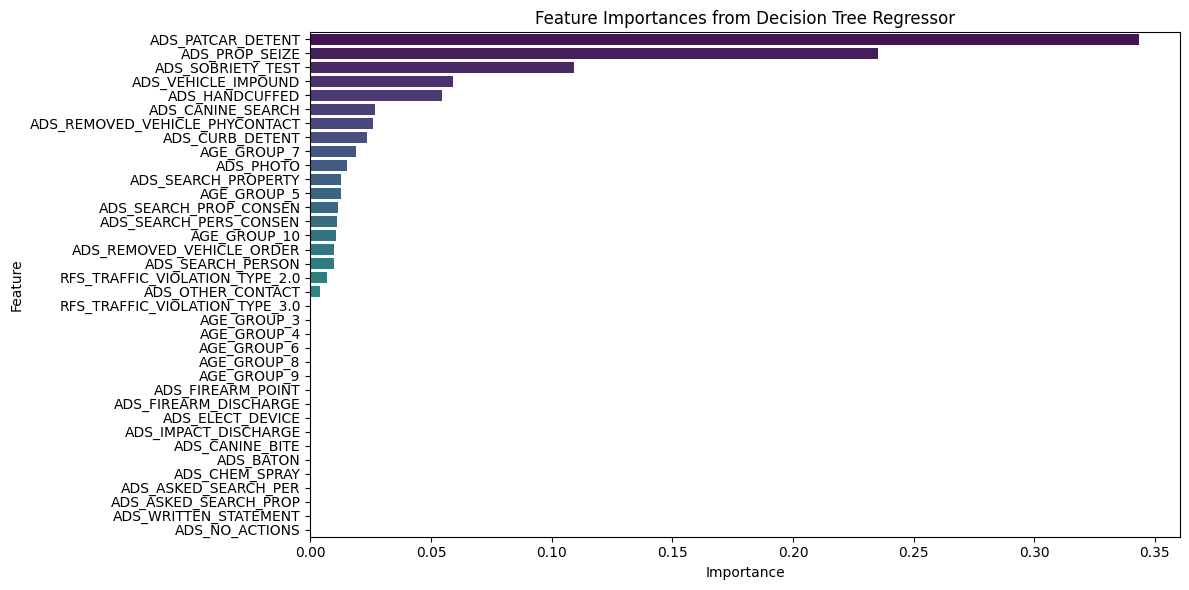

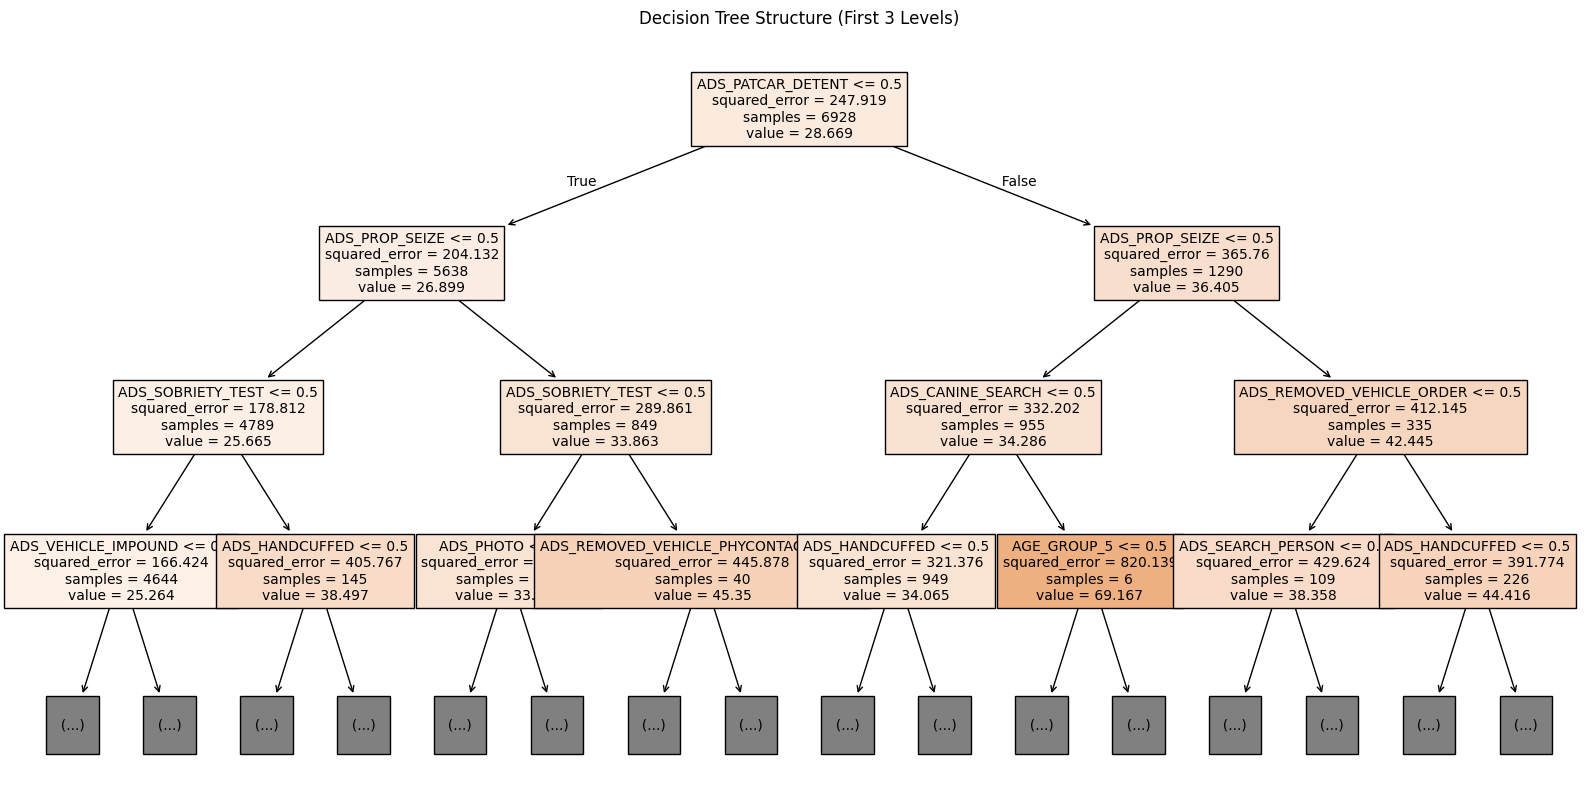

In [82]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Prepare target variable
df_exceed_10_in_range['STOP_DURATION_CLEAN'] = df_exceed_10_in_range['STOP_DURATION'].astype(str).str.extract(r'(\d+)').astype(float)

# Select relevant features (add/remove based on your preference)
ads_columns = [col for col in df_exceed_10_in_range.columns if col.startswith('ADS_')]
other_features = [
    'RFS_TRAFFIC_VIOLATION_TYPE',
    'AGE_GROUP',
    'REASON_FOR_STOP'
]
feature_cols = ads_columns + other_features

# Drop rows with missing values in features or target
data = df_exceed_10_in_range.dropna(subset=feature_cols + ['STOP_DURATION_CLEAN'])

X = data[feature_cols].copy()
y = data['STOP_DURATION_CLEAN']

# Convert categorical columns to string type (for encoding)
categorical_features = ['RFS_TRAFFIC_VIOLATION_TYPE', 'AGE_GROUP', 'REASON_FOR_STOP']
for col in categorical_features:
    X[col] = X[col].astype(str)

# Numerical features are the rest
numerical_features = [col for col in feature_cols if col not in categorical_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline with handle_unknown='ignore'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])

# Decision Tree Regressor pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42, max_depth=5))
])

# Train model
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

# Evaluate model
print(f"R² score on test set: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

# Extract feature importances
model = pipeline.named_steps['regressor']
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(categorical_features)
feature_names = list(encoded_cat_features) + numerical_features

importances = model.feature_importances_
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=[f[1] for f in feature_importances], y=[f[0] for f in feature_importances], hue=[f[0] for f in feature_importances], palette='viridis', legend=False)
plt.title("Feature Importances from Decision Tree Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Visualize the decision tree (limited depth)
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_names, filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Structure (First 3 Levels)")
plt.show()



#### Observations from Decision Tree Regressor

The R² score of 0.1158 and MAE of 10.83 minutes indicate a moderate but improved model fit compared to Iteration 3 (0.0100, ~32.50), suggesting that focusing on `df_exceed_10_in_range` enhances prediction for long stops.

---

##### 1. Feature Importance Analysis

The feature importance chart reveals the most influential factors in determining stop duration.

* **Dominant Predictor:** The single most important feature is **`ADS_PATCAR_DETENT`** (whether a person was detained in a patrol car), which has a significantly higher importance score (~0.35) than any other factor.
* **Secondary Predictors:** Following the initial detention, actions like **`ADS_PROP_SEIZE`** (property seizure), **`ADS_SOBRIETY_TEST`**, and **`ADS_VEHICLE_IMPOUND`** are the next most significant factors.
* **Key Takeaway:** The model's predictions are overwhelmingly driven by specific, tangible actions taken by the officer rather than demographic features like `AGE_GROUP` or the initial reason for the stop.

---

##### 2. Decision Tree Structure (First 3 Levels)

The decision tree visualizes how these features are used to make predictions. The `value` in each box represents the average stop duration (in minutes) for the samples in that node.

* **Root Split:** The tree's first and most critical split is on **`ADS_PATCAR_DETENT <= 0.5`**.
---

#####  3. Insights

1. **Detention is the Deciding Factor:** The act of detaining a person in a patrol car is the primary event that extends the duration of a stop. All subsequent long-duration paths in the tree begin with this action.

2. **Actions Compound Duration:** The model demonstrates that a sequence of police actions logically increases the stop time. A simple stop with no detention is predicted to be shorter, while a stop involving a detention, a canine search, and a vehicle order leads to progressively longer predicted durations.

3. **Limited Predictive Power:** While the model correctly identifies logical drivers of stop duration, its low R² score suggests that these features alone are not enough to create a highly accurate predictive model. A large amount of variance in stop times remains unexplained, likely due to other unmeasured factors, the complexity of the interactions, or the specific circumstances of each stop.

## References
- Census Reporter. (2022). Census profile: California. Census Reporter. https://censusreporter.org/profiles/04000US06-california/
- RIPA. (2023). Statutory Authority 2023 RIPA Dataset. https://data-openjustice.doj.ca.gov/sites/default/files/dataset/2024-12/RIPA%20Dataset%20Read%20Me%202023%20Final.pdf